In [ ]:
if 'google.colab' in str(get_ipython()):
 !pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.5 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=40c743a2d1f0a5e852b0faa25b4aa50f8138a270d3341c3c18feef981a5a7d33
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import openml as oml
import seaborn as sns
from pandas.plotting import scatter_matrix

In [ ]:
moneyball = oml.datasets.get_dataset(41021)

In [ ]:
x, y, _,attribute_names = moneyball.get_data(target = moneyball.default_target_attribute)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
x_clean_array = imputer.fit_transform(x[attribute_names[2:]])

In [ ]:
x_clean = pd.DataFrame(x_clean_array , columns = attribute_names[2:])

In [ ]:
pd.isnull(x).any()

,0
Team,False
League,False
Year,False
RA,False
W,False
OBP,False
SLG,False
BA,False
Playoffs,False
RankSeason,True


In [ ]:
copyframe = x_clean.copy()
copyframe ['y'] = pd.Series(y, index = copyframe.index)
scatter_matrix(copyframe, figsize = (25,25),c = y,s=20,alpha = .8, cmap='viridis')


Output hidden; open in https://colab.research.google.com to view.

In [17]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles_Lab4_p1.csv to netflix_titles_Lab4_p1.csv


In [21]:
import pandas as pd

df_netflix_2019 = pd.read_csv('netflix_titles_Lab4_p1.csv')  # Thay bằng tên file của bạn


In [23]:
# Kiểm tra số lượng giá trị null theo từng cột và sắp xếp giảm dần
df_netflix_2019.isnull().sum().sort_values(ascending=False)

# Kiểm tra kiểu dữ liệu của từng cột
df_netflix_2019.dtypes

,0
show_id,int64
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [24]:
# Hiển thị tỷ lệ phần trăm dữ liệu thiếu của từng cột
for column in df_netflix_2019.columns:
    percentage = df_netflix_2019[column].isnull().mean()
    print(f'{column}: {round(percentage * 100, 2)}%')


show_id: 0.0%
type: 0.0%
title: 0.0%
director: 31.58%
cast: 9.14%
country: 7.64%
date_added: 0.18%
release_year: 0.0%
rating: 0.16%
duration: 0.0%
listed_in: 0.0%
description: 0.0%


In [25]:
# 1. drop
# drop column
df_netflix_2019.drop('director', axis=1)

# drop row
no_director = df_netflix_2019[df_netflix_2019['director'].isnull()].index
df_netflix_2019.drop(no_director, axis=0)

# Hoặc kết hợp với isnull()
df_netflix_2019[~df_netflix_2019['director'].isnull()]

# Hoặc dùng dropna()
df_netflix_2019.dropna(subset=['director'])

# 2. Dùng median, mean (dữ liệu số) hoặc mode (dữ liệu phân loại)
df_netflix_2019[df_netflix_2019['rating'].isnull()]
mode = ''.join(df_netflix_2019['rating'].mode())
df_netflix_2019['rating'].fillna(mode, inplace=True)

# 3. Thay thế bằng số hoặc chuỗi tùy ý
df_netflix_2019['duration'].fillna(0, inplace=True)


/tmp/ipython-input-25-2708021811.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_netflix_2019['rating'].fillna(mode, inplace=True)
/tmp/ipython-input-25-2708021811.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

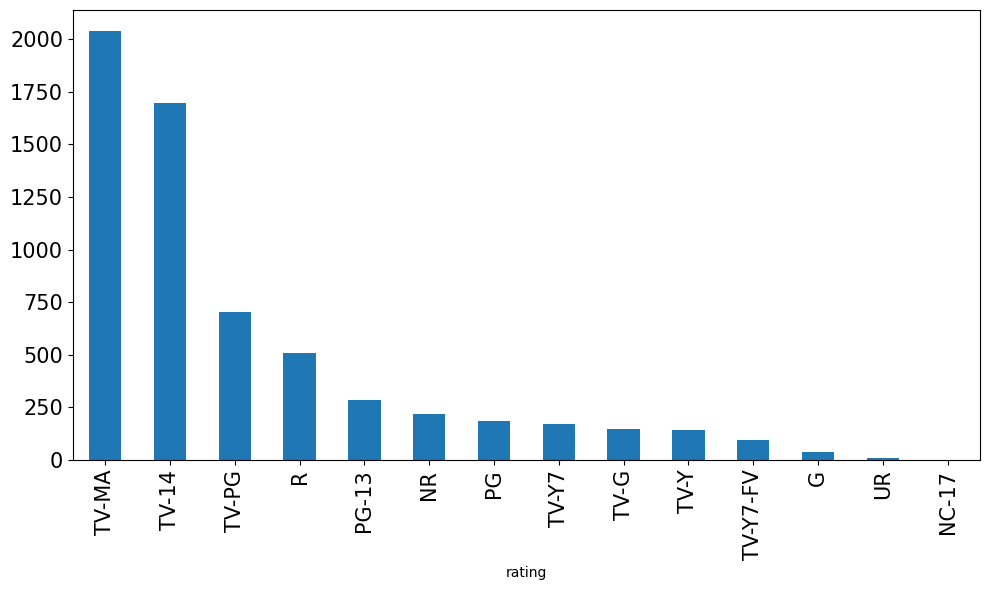

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)

fig = df_netflix_2019['rating'].value_counts().plot.bar().get_figure()

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
fig.savefig('bar_cleaning')
